In [3]:
import keras
from keras.models import Sequential
from keras.models import model_from_json
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
from matplotlib import pyplot

In [5]:
def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,3):
        for j in range(0,3):
            pyplot.subplot2grid((3,3),(i,j))
            pyplot.imshow(X[k])
            k = k+1
    pyplot.show()


# EDA

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

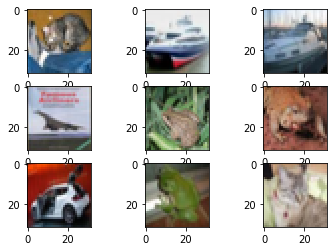

In [4]:
#visualise test data
show_imgs(x_test[:9])

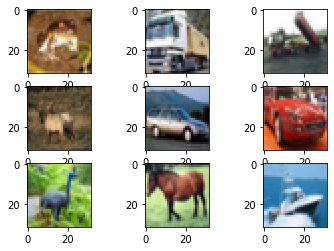

In [5]:
#visualise training data
show_imgs(x_train[:9])

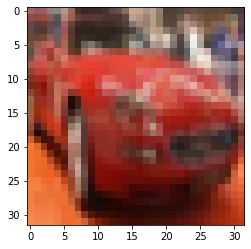

In [6]:
pyplot.imshow(x_train[5])

In [7]:
print('Labels:' , np.unique(y_train))

Labels: [0 1 2 3 4 5 6 7 8 9]


In [8]:
print('X train: ' , x_train.shape)
print('Y train: ' , y_train.shape)
print('X test: ', x_test.shape)
print('Y test: ', y_test.shape)

X train:  (50000, 32, 32, 3)
Y train:  (50000, 1)
X test:  (10000, 32, 32, 3)
Y test:  (10000, 1)


# Preprocessing

In [9]:
#data augmentation and normalization

from keras.preprocessing.image import ImageDataGenerator

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#mean = np.mean(x_train,axis=(0,1,2,3))
#std = np.std(x_train,axis=(0,1,2,3))
#x_train = (x_train-mean)/(std+1e-7)
#x_test = (x_test-mean)/(std+1e-7)
x_train = x_train/255
x_test = x_test/255

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

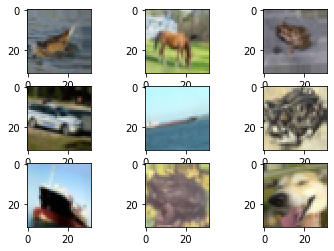

In [10]:
#visualise augmented and normalised training images

from matplotlib import pyplot as plt

for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=True):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(32, 32, 3))
    plt.show()
    break

In [11]:
#one hot encode target variable

num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [12]:
y_test[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

# Model

In [13]:
#model

weight_decay = 1e-4
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [15]:
#training
batch_size = 64

opt_rms = keras.optimizers.RMSprop(lr=0.0005,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size, epochs=40,\
                    verbose=1, validation_data=(x_test,y_test))

Epoch 1/40
781/781 [==============================] - 19s 25ms/step - loss: 1.9211 - accuracy: 0.4059 - val_loss: 1.5226 - val_accuracy: 0.5161
Epoch 2/40
781/781 [==============================] - 19s 24ms/step - loss: 1.3319 - accuracy: 0.5597 - val_loss: 1.2118 - val_accuracy: 0.6193
Epoch 3/40
781/781 [==============================] - 19s 24ms/step - loss: 1.1340 - accuracy: 0.6232 - val_loss: 1.5227 - val_accuracy: 0.5590
Epoch 4/40
781/781 [==============================] - 19s 24ms/step - loss: 1.0228 - accuracy: 0.6620 - val_loss: 0.9031 - val_accuracy: 0.7152
Epoch 5/40
781/781 [==============================] - 19s 24ms/step - loss: 0.9420 - accuracy: 0.6908 - val_loss: 0.8925 - val_accuracy: 0.7163
Epoch 6/40
781/781 [==============================] - 19s 24ms/step - loss: 0.8946 - accuracy: 0.7077 - val_loss: 0.8127 - val_accuracy: 0.7440
Epoch 7/40
781/781 [==============================] - 19s 24ms/step - loss: 0.8552 - accuracy: 0.7228 - val_loss: 0.8937 - val_accuracy:

In [16]:
#testing
scores = model.evaluate(x_test, y_test, batch_size=256, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

40/40 [==============================] - 0s 10ms/step - loss: 0.5850 - accuracy: 0.8411

Test result: 84.110 loss: 0.585


In [17]:
#save locally
model_json = model.to_json()
with open('cifar.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights('cifar.h5')    

# Load Saved Model and Predict

In [7]:
# Load trained model and train it further

json_file = open('cifar.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('cifar.h5')

#model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
#model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    #steps_per_epoch=x_train.shape[0] // batch_size, epochs=20,\
                    #verbose=1, validation_data=(x_test,y_test))

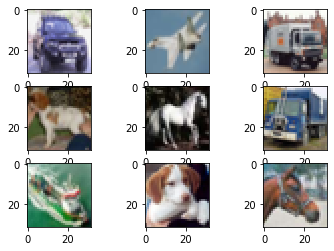

['automobile', 'cat', 'truck', 'cat', 'dog', 'truck', 'automobile', 'cat', 'automobile']


In [11]:
#visualise test results

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

show_imgs(x_test[9:18])
 
#true value of labels
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
 
indices = np.argmax(model.predict(x_test[9:18]),1)
print ([labels[x] for x in indices])

# Analyze Permormance

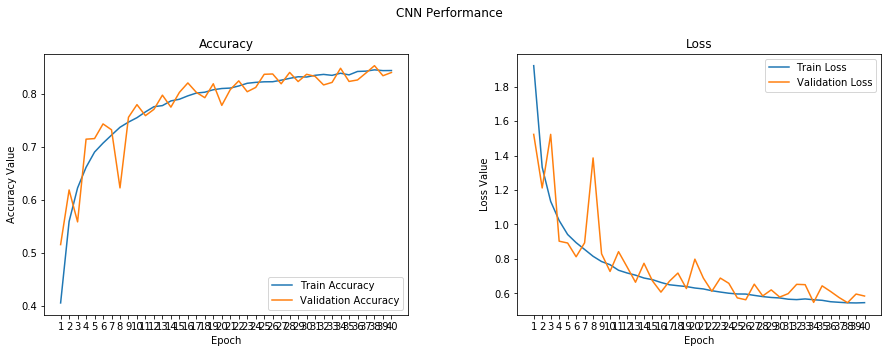

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,40+1))
ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")